# Project 11 - Credit card default propensity prediction

## Objective – 
Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting.
###  Project instructions

    Perform the required data pre-processing to treat for missing values and outliers
    Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
    Identify any multi-collinearity and perform dimensionality reduction like PCA if required
    Use the original X variables or the components from PCA & divide the given data into train and test sets
    Build a model to predict the default propensity of a customer
    Evaluate the model based on model performance measures for classification and recommend the most suitable model.
    Come up with recommendations / actionable insights based on feature importance scores derived from the model.

### About the dataset

The dataset contains the following information of 30000 customers:

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?

Which variables are the strongest predictors of default payment?

Acknowledgements Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.
### Additional information

    The difference between the bill amount and the past pay for a month will give an indication of the pending amount for each month and can be used as an additional X variable
    The average / sum of bill amount can be used as an add

In [132]:
from pyforest import *

In [133]:
data = pd.read_csv("credit_card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# data.describe()

In [4]:
# print(data.info())

In [5]:
# data.columns

In [6]:
# data['DEFAULT'].value_counts()

In [7]:
# data.nunique()

In [8]:
# print(data.EDUCATION.value_counts())
# print(data['MARRIAGE'].value_counts())

Info given to us was:
    
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)
So there is unwanted classes 


In [134]:
df = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0) 
data.loc[df,'EDUCATION']=4
print(data['EDUCATION'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [135]:
df = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0) 
data.loc[df,'EDUCATION']=4
print(data['EDUCATION'].value_counts())
df1 = (data.MARRIAGE == 3)
data.loc[df1,'MARRIAGE'] = 0
print(data['MARRIAGE'].value_counts())

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    15964
1    13659
0      377
Name: MARRIAGE, dtype: int64


In [136]:
print("DEFAULT Probabilty:",data.DEFAULT.sum()/len(data.DEFAULT)*100)


DEFAULT Probabilty: 22.12


22.12% customers are defaulters 

## EDA

### Univariate


The columns in the dataset are either Numerical or categorical.

For Numerical Columns - Create a Histogram | Distplot

Histogram is a Statistical Plot that tells me how is the Data Being Distrib uted. If it is not normal (Bell Shaped), then it would be skewed.

For Categorical Column, we create a BARPLOT/Frequency/Count Plot

BILL_AMT1


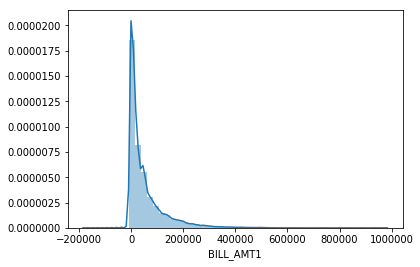

BILL_AMT2


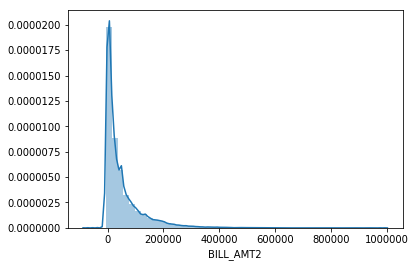

BILL_AMT3


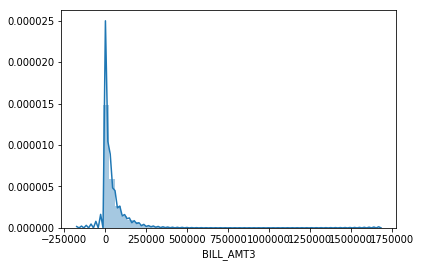

BILL_AMT4


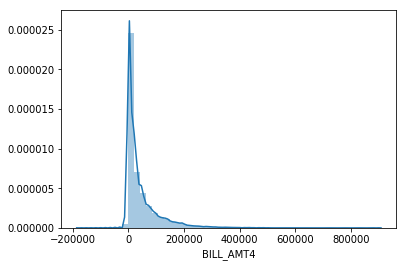

BILL_AMT5


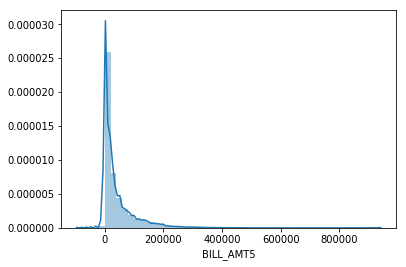

BILL_AMT6


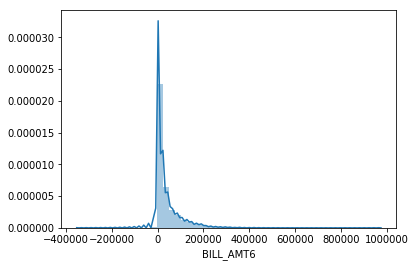

PAY_AMT1


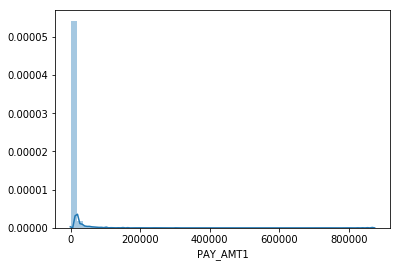

PAY_AMT2


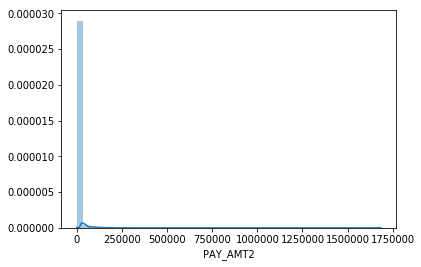

PAY_AMT3


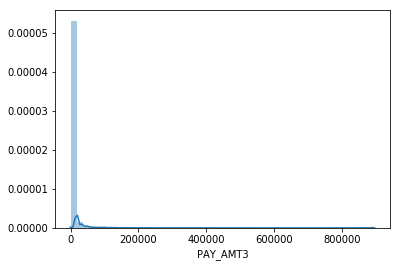

PAY_AMT4


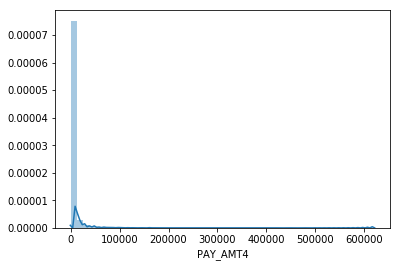

PAY_AMT5


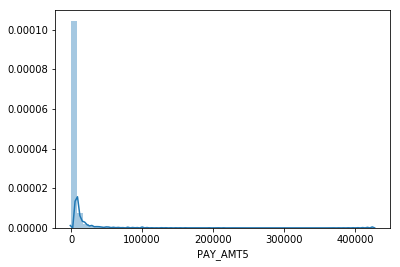

PAY_AMT6


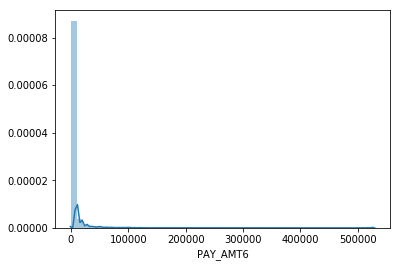

In [40]:
for i in data[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    sns.distplot(data[i])
    plt.show()

'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
are positively skewed and are not normally distributed.


BILL_AMT1


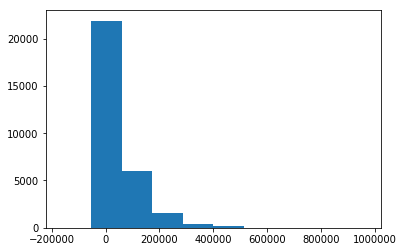

BILL_AMT2


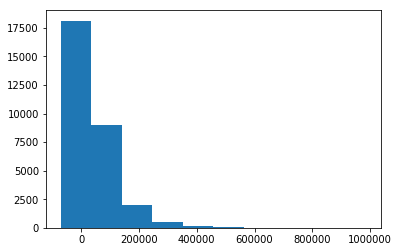

BILL_AMT3


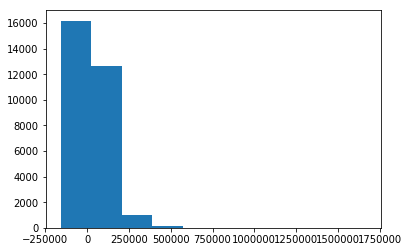

BILL_AMT4


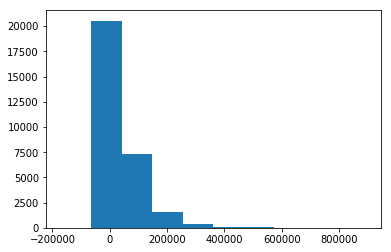

BILL_AMT5


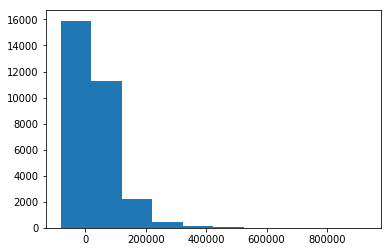

BILL_AMT6


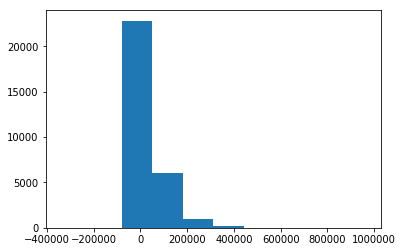

PAY_AMT1


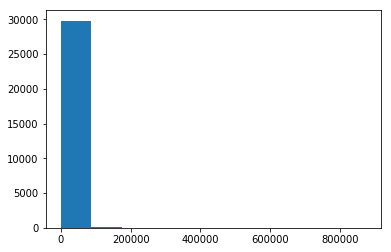

PAY_AMT2


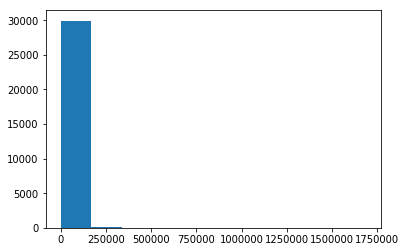

PAY_AMT3


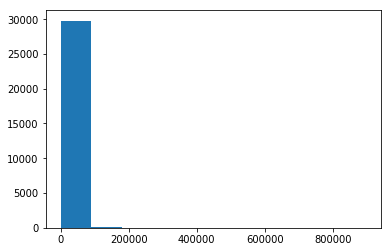

PAY_AMT4


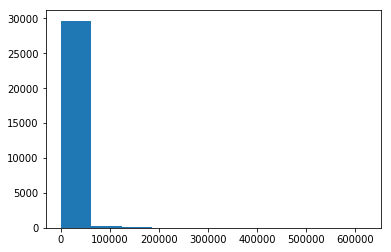

PAY_AMT5


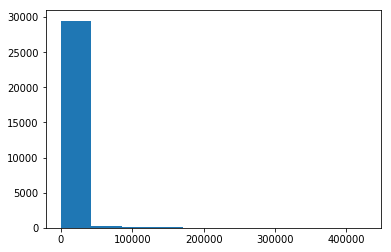

PAY_AMT6


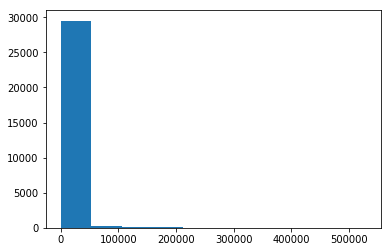

In [44]:
for i in data[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    plt.hist(data[i])
    plt.show()

BILL_AMT1


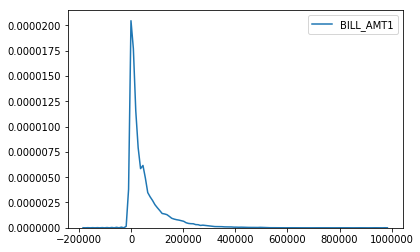

BILL_AMT2


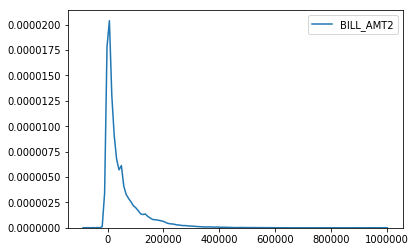

BILL_AMT3


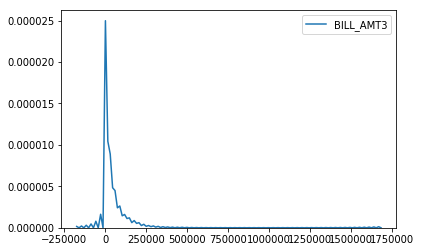

BILL_AMT4


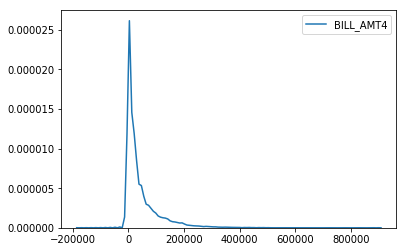

BILL_AMT5


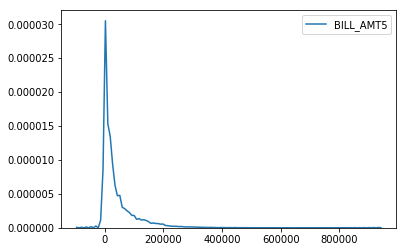

BILL_AMT6


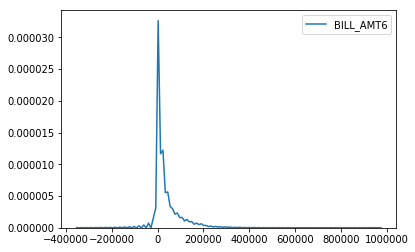

PAY_AMT1


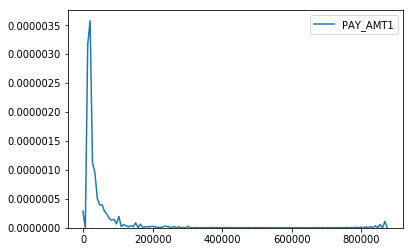

PAY_AMT2


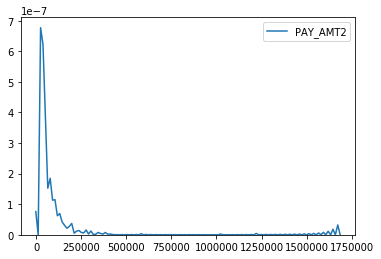

PAY_AMT3


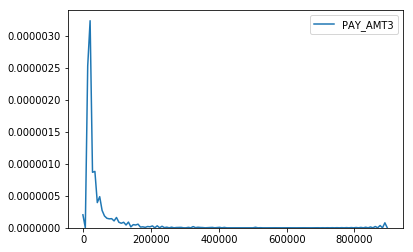

PAY_AMT4


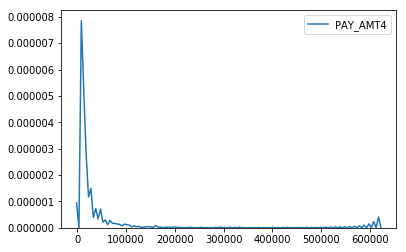

PAY_AMT5


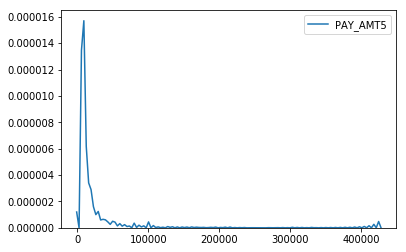

PAY_AMT6


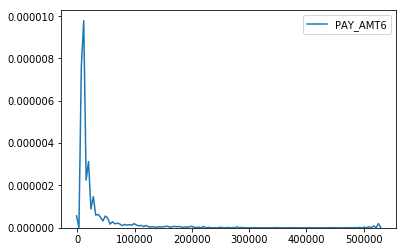

In [48]:
for i in data[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    sns.kdeplot(data[i])
    plt.show()

SEX


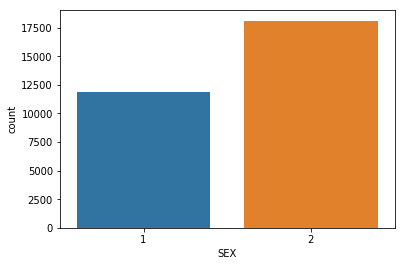

EDUCATION


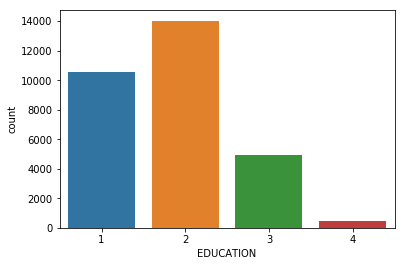

MARRIAGE


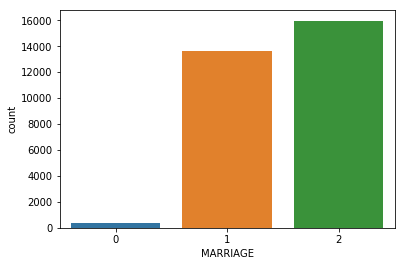

In [50]:
for i in data[['SEX', 'EDUCATION', 'MARRIAGE']]:
    print(i)
    sns.countplot(data[i])
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

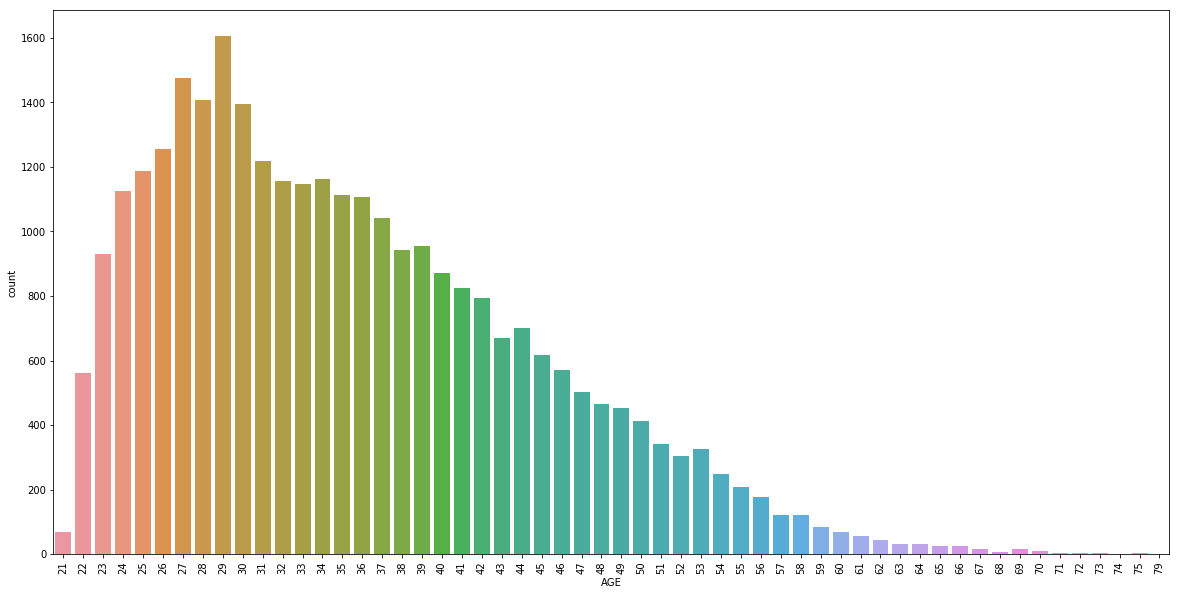

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(data.AGE)
#data.AGE.value_counts().sort_index().plot(kind = "bar")
plt.xticks(rotation=90)

customers whose age is 29 are more

### Bivariate Analysis

    Num vs Num - Scatterplot

    Cat Vs Num - Boxplot (Statistical Plot) | Violin Plot

    Cat Vs Cat - pd.crosstab | Table - Frequency



AxesSubplot(0.125,0.125;0.775x0.755)


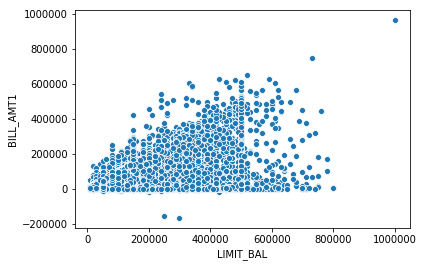

In [57]:
print(sns.scatterplot(data.LIMIT_BAL,data.BILL_AMT1))


AxesSubplot(0.125,0.125;0.775x0.755)


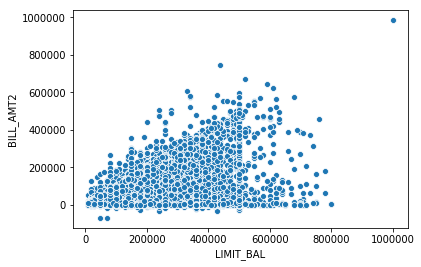

In [58]:
print(sns.scatterplot(data.LIMIT_BAL,data.BILL_AMT2))

LIMIT_BAL


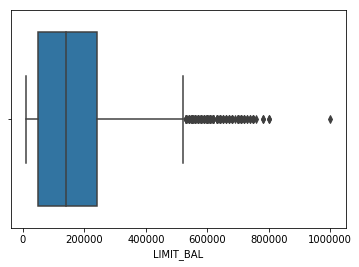

SEX


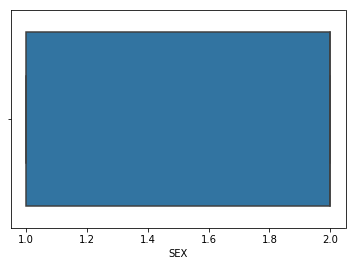

EDUCATION


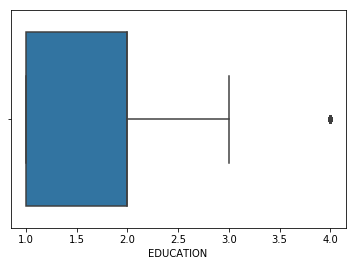

MARRIAGE


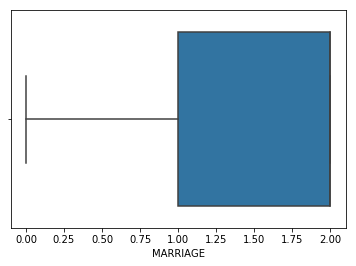

AGE


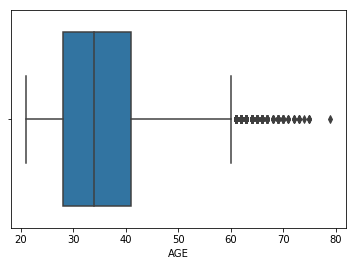

PAY_1


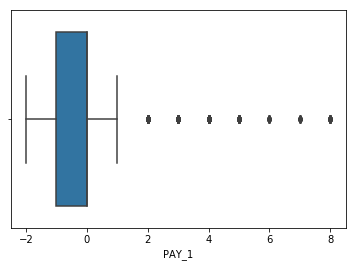

PAY_2


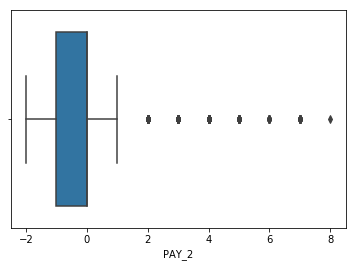

PAY_3


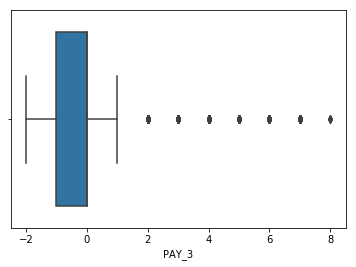

PAY_4


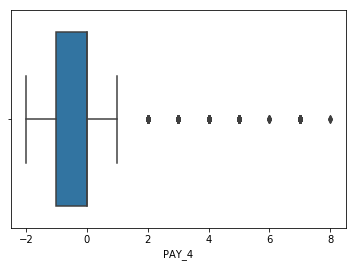

PAY_5


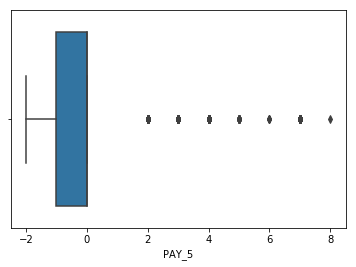

PAY_6


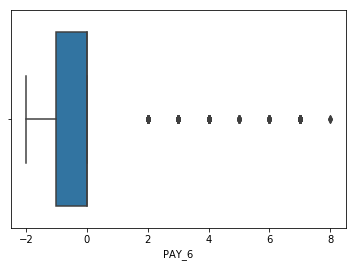

BILL_AMT1


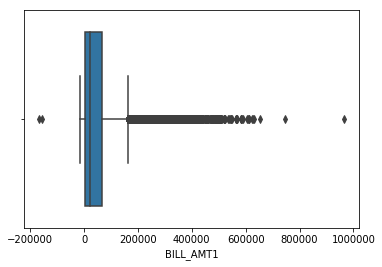

BILL_AMT2


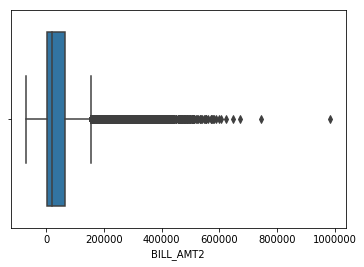

BILL_AMT3


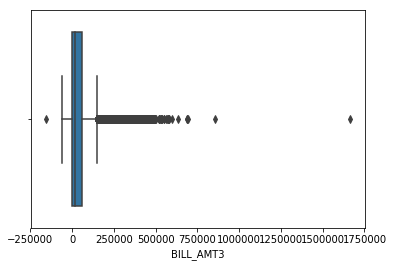

BILL_AMT4


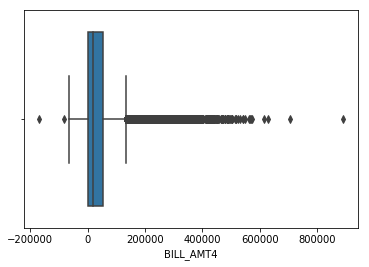

BILL_AMT5


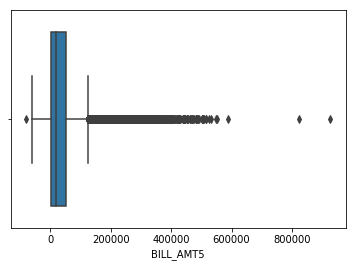

BILL_AMT6


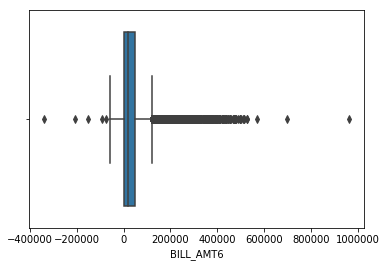

PAY_AMT1


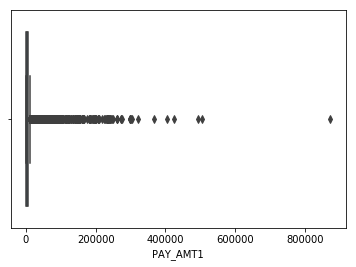

PAY_AMT2


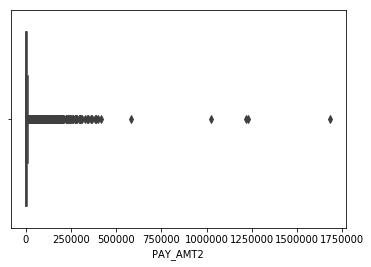

PAY_AMT3


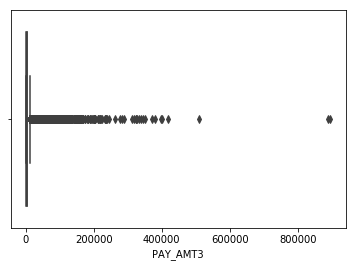

PAY_AMT4


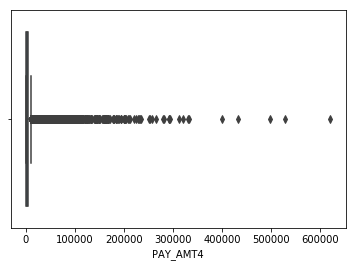

PAY_AMT5


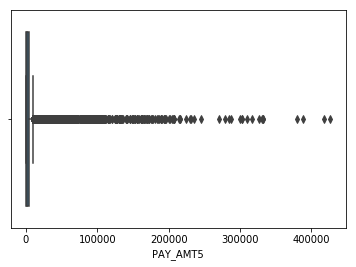

PAY_AMT6


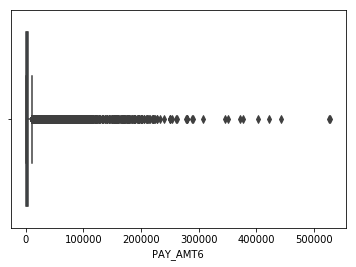

In [59]:
for i in data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]:
    print(i)
    sns.boxplot(data[i])
    plt.show()

There are outliers in all numerical columns

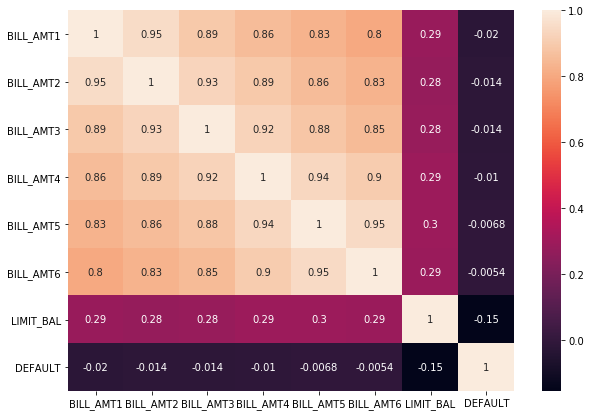

In [64]:
plt.figure(figsize=(10,7))
bill_heat = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','LIMIT_BAL','DEFAULT']
sns.heatmap(data[bill_heat].corr(),annot= True)


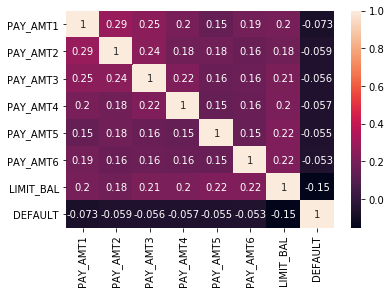

In [67]:
payamt_heat = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"LIMIT_BAL","DEFAULT"]
sns.heatmap(data[payamt_heat].corr(),annot= True)

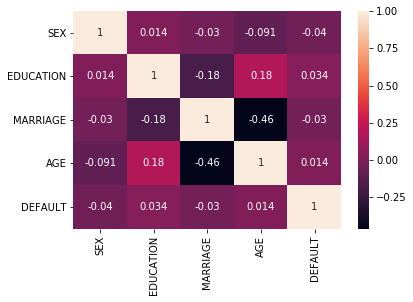

In [72]:
cat_heat = ['SEX','EDUCATION','MARRIAGE','AGE','DEFAULT']
sns.heatmap(data[cat_heat].corr(),annot=True)

In [137]:
data['age_group'] = pd.cut(data.AGE, [20,40,60,81], labels=["young","middle","senior"])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,age_group
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,young
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,young
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,young
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,young
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,middle


In [138]:
data[data['age_group'].isnull()]['AGE']

Series([], Name: AGE, dtype: int64)

In [139]:
data['PAY_TOTAL'] = (data.PAY_1 + data.PAY_2 + data.PAY_3 + data.PAY_4 + data.PAY_5 + data.PAY_6)
data['RISK_CAT'] = pd.cut(data.PAY_TOTAL, [-20,-10,0,40], labels=["low","medium","high"])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,age_group,PAY_TOTAL,RISK_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,young,-2,medium
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,young,3,high
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,young,0,medium
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,young,0,medium
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,middle,-2,medium


In [21]:
# data.isnull().sum()

In [140]:
from sklearn.preprocessing import quantile_transform
import warnings
warnings.filterwarnings('ignore')

In [141]:
data['BILL_AMT1'] = quantile_transform(data[['BILL_AMT1']], output_distribution='normal',random_state=0, copy='warn').flatten()
data['BILL_AMT2'] = quantile_transform(data[['BILL_AMT2']],output_distribution='normal', random_state=0, copy='warn').flatten()
data['BILL_AMT3'] = quantile_transform(data[['BILL_AMT3']],output_distribution='normal', random_state =0, copy = 'warn').flatten()
data['BILL_AMT4'] = quantile_transform(data[['BILL_AMT4']],output_distribution='normal', random_state=0, copy='warn').flatten()
data['BILL_AMT5'] = quantile_transform(data[['BILL_AMT5']],output_distribution='normal', random_state =0, copy = 'warn').flatten()
data['BILL_AMT6'] = quantile_transform(data[['BILL_AMT6']],output_distribution='normal', random_state= 0, copy= 'warn').flatten()

data['PAY_AMT1'] =(quantile_transform(data[['PAY_AMT1']],output_distribution='normal' ,random_state=0, copy='warn')).flatten()
data['PAY_AMT2'] = (quantile_transform(data[['PAY_AMT2']], output_distribution='normal', random_state=0, copy='warn')).flatten()
data['PAY_AMT3'] = (quantile_transform(data[['PAY_AMT3']],output_distribution='normal',  random_state=0, copy='warn')).flatten()
data['PAY_AMT4'] = (quantile_transform(data[['PAY_AMT4']],output_distribution='normal',  random_state=0, copy='warn')).flatten()
data['PAY_AMT5'] = (quantile_transform(data[['PAY_AMT5']],output_distribution='normal',  random_state=0, copy='warn')).flatten()
data['PAY_AMT6'] = (quantile_transform(data[['PAY_AMT6']],output_distribution='normal',  random_state=0, copy='warn')).flatten()
data['LIMIT_BAL'] = (quantile_transform(data[['LIMIT_BAL']],output_distribution='normal',random_state = 0,copy='warn')).flatten()

In [142]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,age_group,PAY_TOTAL,RISK_CAT
0,1,-1.649237,2,2,1,24,2,2,-1,-1,...,-5.199338,-0.708467,-5.199338,-5.199338,-5.199338,-5.199338,1,young,-2,medium
1,2,-0.130848,2,2,2,26,-1,2,0,0,...,-5.199338,-0.621099,-0.408805,-0.245840,-5.199338,0.177827,1,young,3,high
2,3,-0.329548,2,2,2,34,0,0,0,0,...,-0.349928,-0.316330,-0.408805,-0.245840,-0.249721,0.826698,0,young,0,medium
3,4,-0.842694,2,2,1,37,0,0,0,0,...,-0.105580,0.007395,-0.266584,-0.137177,-0.161281,-0.221344,0,young,0,medium
4,5,-0.842694,1,2,1,57,-1,0,-1,0,...,-0.105580,2.006938,1.275302,1.244778,-0.434928,-0.403356,0,middle,-2,medium


ID


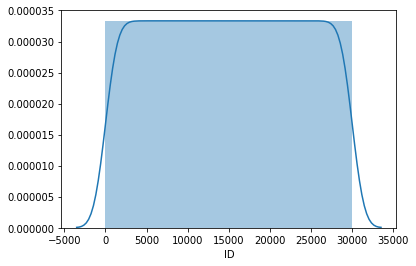

LIMIT_BAL


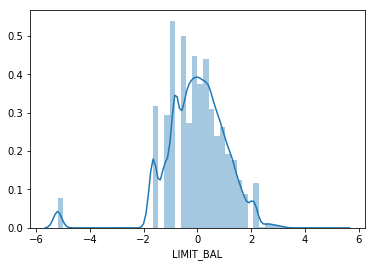

SEX


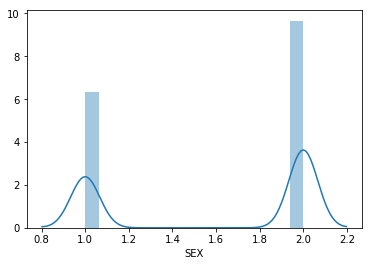

EDUCATION


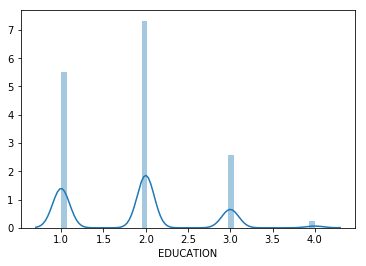

MARRIAGE


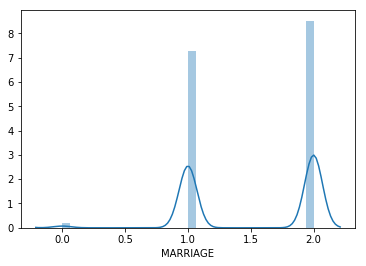

AGE


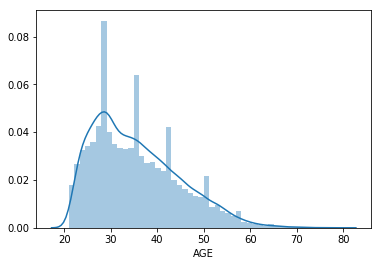

PAY_1


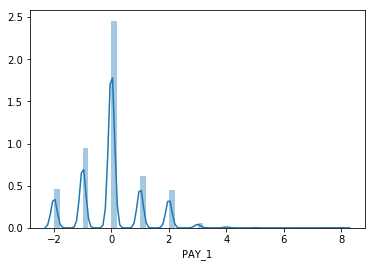

PAY_2


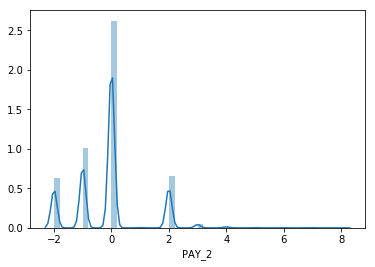

PAY_3


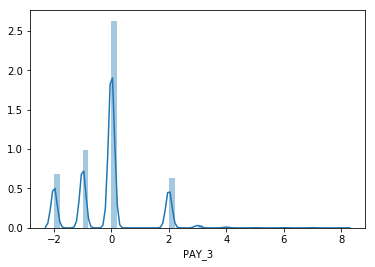

PAY_4


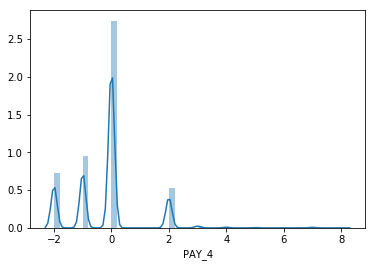

PAY_5


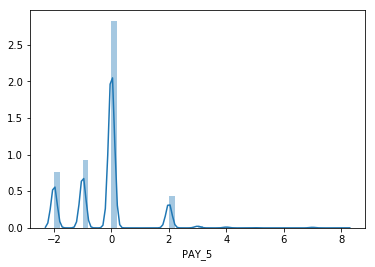

PAY_6


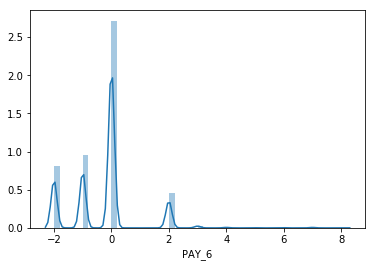

BILL_AMT1


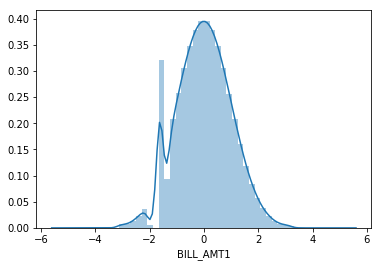

BILL_AMT2


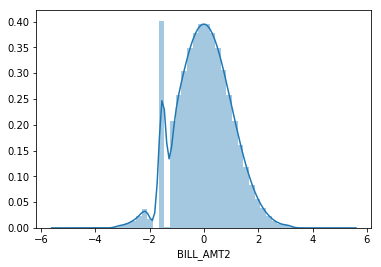

BILL_AMT3


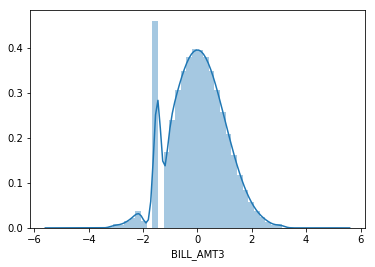

BILL_AMT4


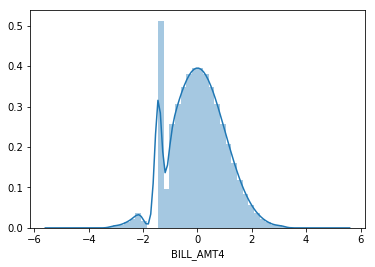

BILL_AMT5


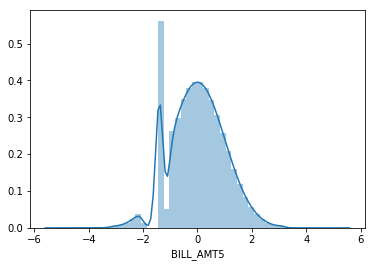

BILL_AMT6


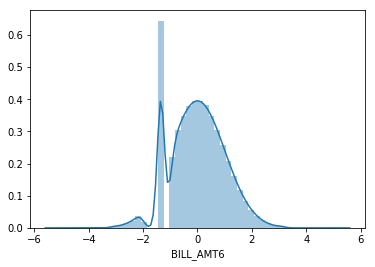

PAY_AMT1


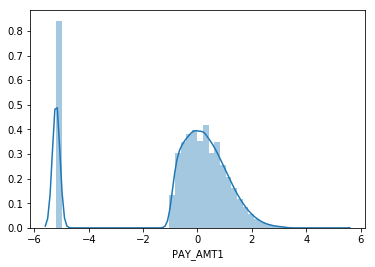

PAY_AMT2


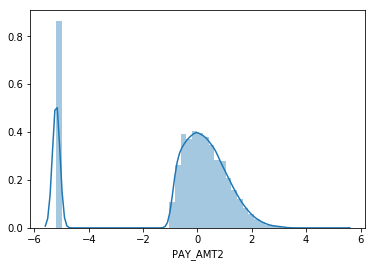

PAY_AMT3


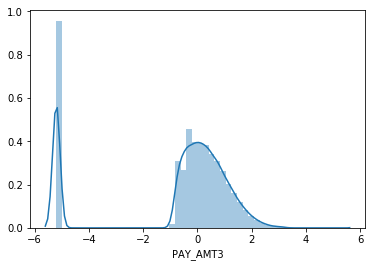

PAY_AMT4


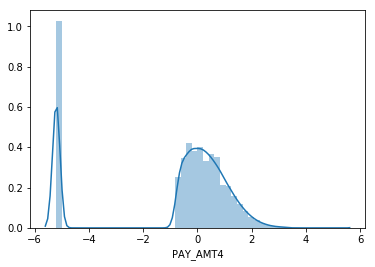

PAY_AMT5


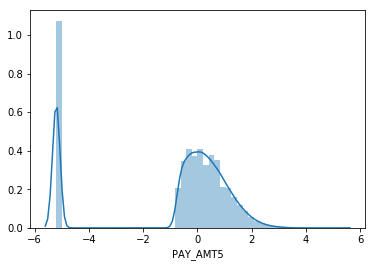

PAY_AMT6


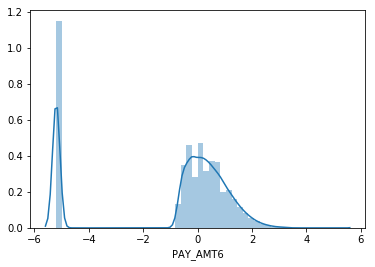

DEFAULT


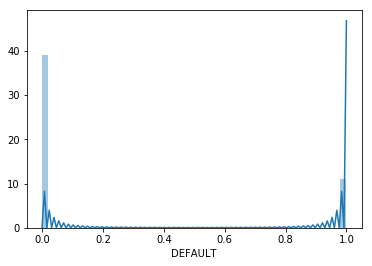

age_group


TypeError: unsupported operand type(s) for /: 'str' and 'int'

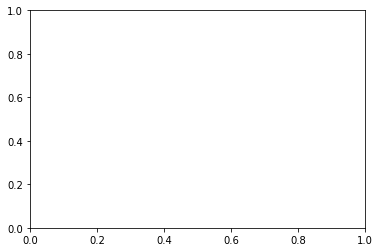

In [15]:
for i in data:
    print(i)
    sns.distplot(data[i])
    plt.show()

In [ ]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats
a = data['RISK_CAT'].values
b = data['DEFAULT'].values

quality_array = np.array([[2138,17570,3211],[352,2807,2466]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.8f P value %1.5f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
print(p_value)

In [143]:
risk_map = {'low':0,'medium':1,'high':2}
data['RISK_CAT'] =  data['RISK_CAT'].map(risk_map)

In [144]:
age_map = {'young':0,'middle':1,'senior':2}
data['AGE_CAT'] = data['age_group'].map(age_map)

In [145]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,age_group,PAY_TOTAL,RISK_CAT,AGE_CAT
0,1,-1.649237,2,2,1,24,2,2,-1,-1,...,-0.708467,-5.199338,-5.199338,-5.199338,-5.199338,1,young,-2,1,0
1,2,-0.130848,2,2,2,26,-1,2,0,0,...,-0.621099,-0.408805,-0.245840,-5.199338,0.177827,1,young,3,2,0
2,3,-0.329548,2,2,2,34,0,0,0,0,...,-0.316330,-0.408805,-0.245840,-0.249721,0.826698,0,young,0,1,0
3,4,-0.842694,2,2,1,37,0,0,0,0,...,0.007395,-0.266584,-0.137177,-0.161281,-0.221344,0,young,0,1,0
4,5,-0.842694,1,2,1,57,-1,0,-1,0,...,2.006938,1.275302,1.244778,-0.434928,-0.403356,0,middle,-2,1,1


In [37]:
# data.isnull().sum()

In [147]:
data.drop(['ID','AGE', 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_TOTAL','age_group'],axis=1,inplace=True)

In [146]:
data_latest = data.copy()

In [149]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,RISK_CAT,AGE_CAT
0,-1.649237,2,2,1,-0.648811,-0.666412,-0.946299,-1.435477,-1.404533,-1.343287,-5.199338,-0.708467,-5.199338,-5.199338,-5.199338,-5.199338,1,1,0
1,-0.130848,2,2,2,-0.748892,-0.803280,-0.673832,-0.596089,-0.534376,-0.489309,-5.199338,-0.621099,-0.408805,-0.245840,-5.199338,0.177827,1,2,0
2,-0.329548,2,2,2,0.140851,-0.222909,-0.217297,-0.163181,-0.099893,-0.043822,-0.349928,-0.316330,-0.408805,-0.245840,-0.249721,0.826698,0,1,0
3,-0.842694,2,2,1,0.393435,0.450791,0.527082,0.242630,0.323377,0.374153,-0.105580,0.007395,-0.266584,-0.137177,-0.161281,-0.221344,0,1,0
4,-0.842694,1,2,1,-0.407018,-0.515425,0.314461,0.083049,0.051622,0.083001,-0.105580,2.006938,1.275302,1.244778,-0.434928,-0.403356,0,1,1


In [255]:
from sklearn.model_selection import train_test_split
X = data.drop(['DEFAULT'],axis=1)
y = data.DEFAULT
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, cohen_kappa_score, f1_score

### LOGISTIC REGRESSION

In [271]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_predict = log_reg.predict(X_test)
log_score_test = log_reg.score(X_test,y_test)

log_score_train = log_reg.score(X_train,y_train)

print("Testing",log_score_test)
print("Training",log_score_train)

Testing 0.7913333333333333
Training 0.7874222222222222


In [272]:
print(metrics.confusion_matrix(y_test, y_predict)[1,0])
print(metrics.classification_report(y_test, y_predict))
print(f1_score(y_test,y_predict))
print(recall_score(y_test,y_predict))

1339
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5868
           1       0.56      0.18      0.27      1632

    accuracy                           0.79      7500
   macro avg       0.69      0.57      0.58      7500
weighted avg       0.76      0.79      0.75      7500

0.27243142724314273
0.1795343137254902


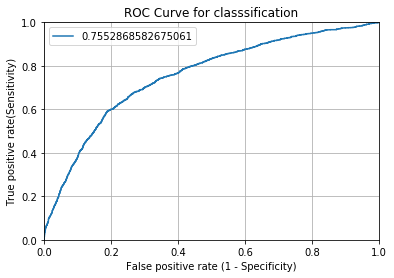

In [273]:
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob)
auc_logr = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label=auc_logr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for classsification')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.legend()
plt.grid(True)

Threshold management 

In [259]:
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob],0.18)[0]



In [260]:
from sklearn import metrics 

In [261]:
print(metrics.confusion_matrix(y_test,y_pred_class))

[[4080 1788]
 [ 483 1149]]


In [262]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      5868
           1       0.39      0.70      0.50      1632

    accuracy                           0.70      7500
   macro avg       0.64      0.70      0.64      7500
weighted avg       0.78      0.70      0.72      7500



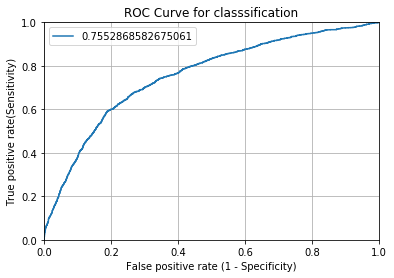

In [265]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob)
auc_logr = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label=auc_logr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for classsification')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.legend()
plt.grid(True)

In [195]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr1[threshold1 > threshold][-1])
    print('Specificity:', 1 - fpr1[threshold1 > threshold][-1])
evaluate_threshold(0.18)

Sensitivity: 0.7040441176470589
Specificity: 0.6966598500340832


In [ ]:
from sklearn.model_selection import LogisticRegression
from sklearn.model_selection import cross_val_score


### Random Forest

In [268]:
from sklearn.model_selection import train_test_split
X = data.drop(['DEFAULT'],axis=1)
y = data.DEFAULT
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [269]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
print("Training acc: ",rf.score(X_train,y_train))
print("Testing acc: ",rf.score(X_test,y_test))
print(metrics.confusion_matrix(y_test, ypred_rf)[1,0])
print(metrics.classification_report(y_test, ypred_rf))
print(f1_score(y_test,ypred_rf))
print(recall_score(y_test,ypred_rf))

Training acc:  0.9778222222222223
Testing acc:  0.7873333333333333
1226
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      5868
           1       0.52      0.25      0.34      1632

    accuracy                           0.79      7500
   macro avg       0.67      0.59      0.61      7500
weighted avg       0.75      0.79      0.76      7500

0.3373493975903615
0.24877450980392157


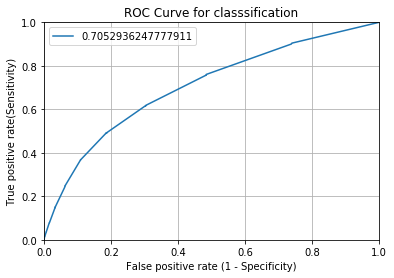

In [270]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob)
auc_logr = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label=auc_logr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for classsification')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.legend()
plt.grid(True)

In [252]:
rf1 = RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=50,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=144, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False)
rf1.fit(X_train,y_train)
ypred_rf1 = rf1.predict(X_test)
print('Training accuracy: ',rf1.score(X_train,y_train))
print('Testing accuracy: ',rf1.score(X_test,y_test))
print('Confusion matrix:\n ',confusion_matrix(y_test,ypred_rf1))
print(metrics.classification_report(y_test, ypred_rf1))

# RandomForestClassifier(bootstrap=True, class_weight='balanced',
#             criterion='entropy', max_depth=None, max_features='auto',
#             max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=400, n_jobs=-1, oob_score=False,
#             random_state=None, verbose=0, warm_start=False

Training accuracy:  0.9970666666666667
Testing accuracy:  0.7929333333333334
Confusion matrix:
  [[5484  384]
 [1169  463]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88      5868
           1       0.55      0.28      0.37      1632

    accuracy                           0.79      7500
   macro avg       0.69      0.61      0.62      7500
weighted avg       0.76      0.79      0.77      7500



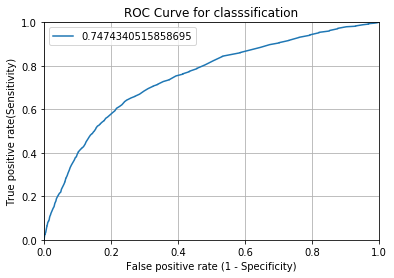

In [254]:
y_pred_prob = rf1.predict_proba(X_test)[:,1]
from sklearn.preprocessing import binarize
# y_pred_class = binarize([y_pred_prob],0.18)[0]

# print(metrics.confusion_matrix(y_test,y_pred_class))

import matplotlib.pyplot as plt
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob)
auc_rf = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label=auc_rf)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for classsification')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.legend()
plt.grid(True)



In [248]:
# def evaluate_threshold(threshold):
#     print('Sensitivity:', tpr1[threshold1 > threshold][-1])
#     print('Specificity:', 1 - fpr1[threshold1 > threshold][-1])
# evaluate_threshold(0.18)




### GBM

In [103]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import warnings

Accuracy of the GBM on test set: 0.794
Accuracy of the GBM on train set: 0.997
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5868
           1       0.55      0.30      0.38      1632

    accuracy                           0.79      7500
   macro avg       0.69      0.61      0.63      7500
weighted avg       0.77      0.79      0.77      7500

Confusion matrix:
  [[5476  392]
 [1150  482]]


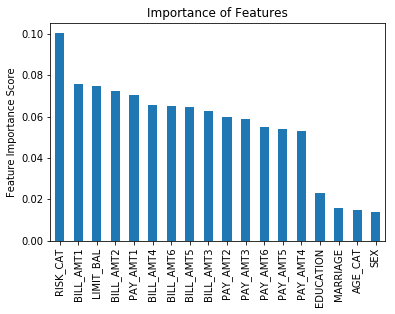

In [275]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X = data.drop(['DEFAULT'],axis=1)
y = data.DEFAULT
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=144,max_depth=None, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
print('Accuracy of the GBM on train set: {:.3f}'.format(baseline.score(X_train, y_train)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))
print('Confusion matrix:\n ',confusion_matrix(y_test,pred))

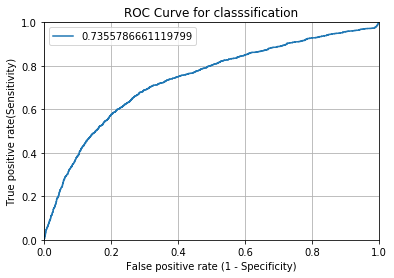

In [276]:
y_pred_prob = baseline.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob)
auc_logr = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label=auc_logr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for classsification')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.legend()
plt.grid(True)

In [224]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [277]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [278]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 80,
    'learning_rate': 0.05,
    'silent': True,
    'n_estimators': 144
}

model = XGBClassifier(**params).fit(X_train, y_train)

In [279]:
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print(classification_report(y_test, y_pred))
print('Confusion matrix:\n ',confusion_matrix(y_test,y_pred))

Misclassified samples: 1560
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      5868
           1       0.54      0.31      0.39      1632

    accuracy                           0.79      7500
   macro avg       0.68      0.62      0.63      7500
weighted avg       0.76      0.79      0.77      7500

Confusion matrix:
  [[5442  426]
 [1134  498]]


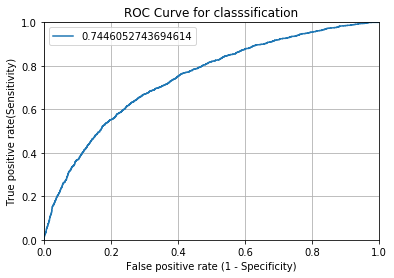

In [280]:
y_pred_prob = model.predict_proba(X_test)[:,1]
import matplotlib.pyplot as plt
from sklearn.metrics import auc
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob)
auc_logr = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label=auc_logr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for classsification')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate(Sensitivity)')
plt.legend()
plt.grid(True)

In [28]:
from sklearn.model_selection import train_test_split
Xgb = datadf.drop(['DEFAULT'],axis=1)
ygb = datadf.DEFAULT
X_train1,X_test1,y_train1,y_test1 = train_test_split(Xgb,ygb,test_size = 0.25,random_state = 0)

Accuracy of the GBM on test set: 0.826
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5868
           1       0.68      0.37      0.48      1632

    accuracy                           0.83      7500
   macro avg       0.76      0.66      0.69      7500
weighted avg       0.81      0.83      0.81      7500

Confusion matrix:
  [[5587  281]
 [1024  608]]


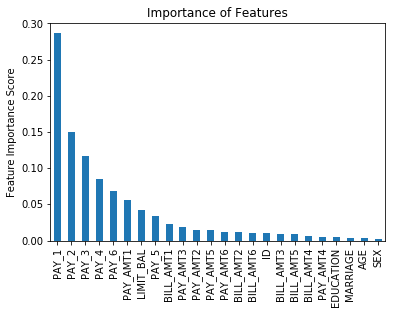

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train1,y_train1)
predictors=list(X_train1)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test1, y_test1)))
pred1=baseline.predict(X_test1)
print(classification_report(y_test1, pred1))
print('Confusion matrix:\n ',confusion_matrix(y_test1,pred1))

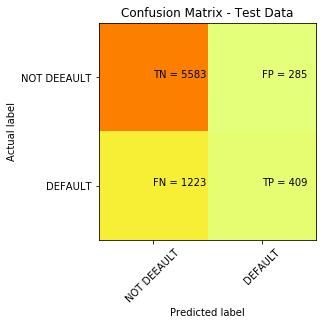

Sensitivity: 0.2506127450980392
Specificity: 0.9514314928425358


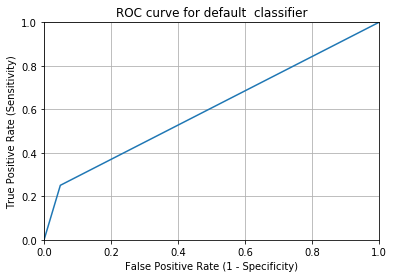

In [40]:

import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['NOT DEEAULT','DEFAULT']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for default  classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(0.8)

In [128]:

>>> from sklearn.linear_model import LogisticRegressionCV

>>> clf = LogisticRegressionCV(cv=5, random_state=0,
                        multi_class='multinomial').fit(X, y)
>>> clf.predict(X[:2, :])
array([0, 0])
>>> clf.predict_proba(X[:2, :]).shape
(2, 3)
>>> clf.score(X, y)

NameError: name 'cross_validation' is not defined

In [131]:
clf = LogisticRegressionCV(cv=5, random_state=0,
                       multi_class='multinomial').fit(X1, y1)
y_predict = log_reg.predict(X_test)
log_score_test = log_reg.score(X_test,y_test)

log_score_train = log_reg.score(X_train,y_train)

print("Testing",log_score_test)
print("Training",log_score_train)

Testing 0.7914666666666667
Training 0.7876


In [ ]:
#cross validation for logistic regression
from sklearn.metrics import  make_scorer
cv_scores_lr=[]
f1_scorer = make_scorer(f1_score)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,xtrain,ytrain, cv=10,scoring=f1_scorer)
cv_scores_lr.append(scores.mean())
print("cv_score value",cv_scores_lr)